In [19]:
from __future__ import print_function
from keras.engine import Model
from keras_vggface.vggface import VGGFace
from keras.preprocessing import image

import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

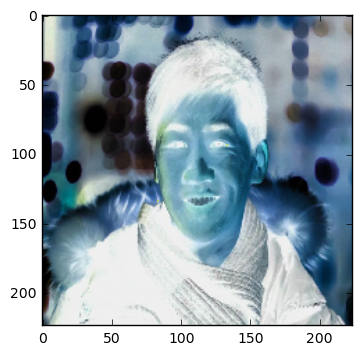

In [20]:
img = image.load_img('cropped_profile.jpg', target_size=(224,224))
x = image.img_to_array(img) # some fucked up color
plt.imshow(x)

The following pre-processing is similar to the built in pre_processing
for keras:

https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py

and is used in this feature extraction example:
https://keras.io/applications/#extract-features-with-vgg16

The author of this VGGFace library showed similar code (under prediction):
https://github.com/rcmalli/keras-vggface#example-usage

but it seems like the values they each used for zero-center is different


In [21]:
x = np.expand_dims(x, axis=0)
# tf order 'channel-last'
x = x[:, :, :, ::-1]

# Zero-center by mean pixel
x[:, 0, :, :] -= 93.5940
x[:, 1, :, :] -= 104.7624
x[:, 2, :, :] -= 129.1863

In [22]:
from keras.layers import Input

image_input = Input(shape=(224, 224, 3))
vgg_model_conv = VGGFace(include_top=False, pooling='avg')
#vgg_model_conv.summary()

In [23]:
# Get features
features = vgg_model_conv.predict(x)
features

array([[  8.20828676e-02,   1.12791002e+00,   3.29488754e+00,
          7.09087476e-02,   9.89702493e-02,   2.86149502e+00,
          3.40208721e+00,   2.34029460e+00,   5.99422514e-01,
          9.72033024e-01,   2.14872932e+00,   1.17322960e+01,
          3.15256119e+00,   1.14591539e+00,   3.27633762e+00,
          1.00965261e+01,   5.73483780e-02,   5.53607321e+00,
          1.07080388e+00,   3.08241868e+00,   6.86436951e-01,
          8.01453972e+00,   1.57733369e+00,   1.18502510e+00,
          6.16959035e-01,   5.67115498e+00,   2.71353149e+00,
          0.00000000e+00,   4.85789156e+00,   7.26799428e-01,
          4.52629662e+00,   2.10968685e+00,   2.84963369e+00,
          1.31159668e+01,   6.41579747e-01,   1.73330021e+00,
          1.00483668e+00,   0.00000000e+00,   2.33774757e+01,
          9.04893219e-01,   2.29255867e+00,   4.86805058e+00,
          3.80579019e+00,   1.63127816e+00,   1.98730037e-01,
          7.25338125e+00,   5.91020167e-01,   1.84994221e+00,
        

In [24]:
features.shape

(1, 512)